In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv("/Dataset .csv")

In [12]:
columns_to_drop = [
    "Restaurant ID", "Restaurant Name", "Address", "Locality", "Locality Verbose",
    "Currency", "Rating color", "Rating text", "Switch to order menu"
]
df_cleaned = pd.get_dummies(df_cleaned, columns=["City"], drop_first=True)
df_cleaned = df.drop(columns=columns_to_drop)

In [17]:
le = LabelEncoder()
df_cleaned["City"] = le.fit_transform(df_cleaned["City"])

In [18]:
binary_columns = ["Has Table booking", "Has Online delivery", "Is delivering now"]
for col in binary_columns:
    df_cleaned[col] = df_cleaned[col].map({"Yes": 1, "No": 0})


In [20]:
print(df_cleaned.dtypes)

Country Code                                  int64
City                                          int64
Longitude                                   float64
Latitude                                    float64
Average Cost for two                          int64
                                             ...   
Cuisines_Western, Asian, Cafe                  bool
Cuisines_Western, Fusion, Fast Food            bool
Cuisines_World Cuisine                         bool
Cuisines_World Cuisine, Mexican, Italian       bool
Cuisines_World Cuisine, Patisserie, Cafe       bool
Length: 1835, dtype: object


In [21]:
X = df_cleaned.drop(columns=["Aggregate rating"])
y = df_cleaned["Aggregate rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:

# Predict on Test Data
y_pred = model.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.09112673050758763
R-squared Score: 0.959963810654253


In [26]:
# Feature Importance Analysis
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("\nTop Features Influencing Ratings:")
print(feature_importances.head(10))


Top Features Influencing Ratings:
Votes                             0.945780
Longitude                         0.013800
Latitude                          0.010912
Average Cost for two              0.005359
Country Code                      0.003303
City                              0.001499
Cuisines_North Indian, Chinese    0.000755
Price range                       0.000685
Cuisines_North Indian             0.000587
Cuisines_North Indian, Mughlai    0.000532
dtype: float64


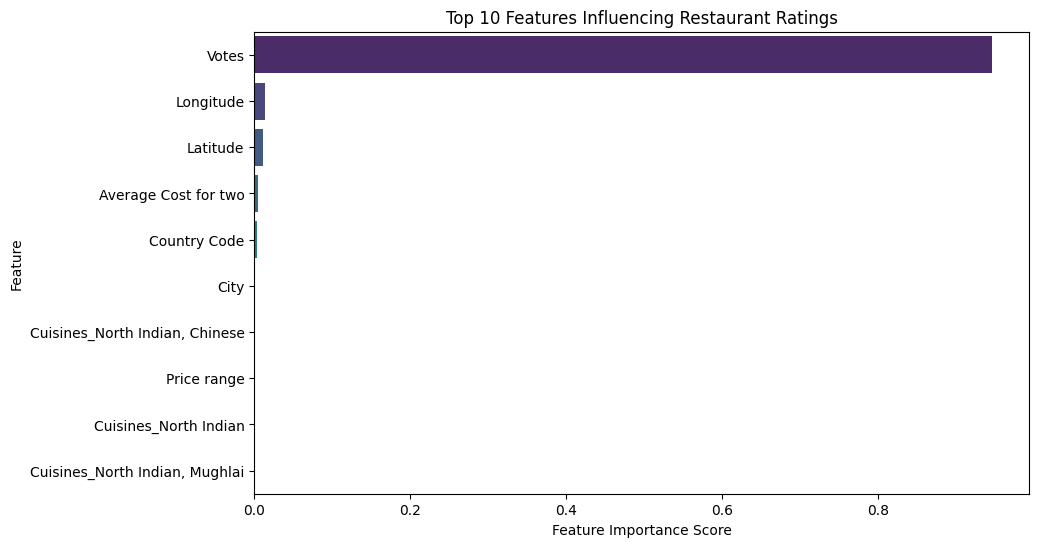

In [28]:
# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature_importances.head(10),
    y=feature_importances.head(10).index,
    hue=feature_importances.head(10).index,  # Assign hue
    palette="viridis",
    legend=False  # Remove legend since hue is same as y
)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Features Influencing Restaurant Ratings")
plt.show()